# Phase 2 Code Challenge Review

The topics covered will be:

1. SQL
2. Bayesian Statistics (Not covered on CC - Wanted to include a question or two for practice)
3. Normal Distributions
4. Statistical Tests

In [1]:
from src.call import call_on_students

## Part 1: SQL

In [2]:
# Need to import pandas and sqlite3
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')

In [4]:
pd.read_sql(
    """
    SELECT *
    FROM Customer
    LIMIT 3
    """, conn
)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [5]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94


### Task 1: Write a query to return the customer IDs for every customer in Germany.

In [6]:
call_on_students(1)

['Elif']


In [8]:
pd.read_sql("""
SELECT CustomerId
FROM Customer
WHERE Country = "Germany"
""", conn)

,CustomerId
0,2
1,36
2,37
3,38


### Task 2: Write a query to return the last names, email addresses and *billing* addresses of the customers who live in Canada.

In [9]:
call_on_students(1)

['Eli']


In [17]:
pd.read_sql("""
SELECT DISTINCT LastName, Email, Address, BillingAddress
FROM Customer
    JOIN Invoice
        USING(CustomerId)
WHERE Country = 'Canada'         
""", conn)

,LastName,Email,Address,BillingAddress
0,Philips,mphilips12@shaw.ca,8210 111 ST NW,8210 111 ST NW
1,Silk,marthasilk@gmail.com,194A Chain Lake Drive,194A Chain Lake Drive
2,Sullivan,ellie.sullivan@shaw.ca,5112 48 Street,5112 48 Street
3,Peterson,jenniferp@rogers.ca,700 W Pender Street,700 W Pender Street
4,Brown,robbrown@shaw.ca,796 Dundas Street West,796 Dundas Street West
5,Francis,edfrancis@yachoo.ca,230 Elgin Street,230 Elgin Street
6,Mitchell,aaronmitchell@yahoo.ca,696 Osborne Street,696 Osborne Street
7,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,1498 rue Bélanger


### Task 3: Write a query to return the billing totals by country, in descending order of the totals.

In [18]:
call_on_students(1)

['Ricky']


In [25]:
pd.read_sql("""
SELECT BillingCountry, SUM(Total) AS TotalPurchase
FROM invoice
GROUP BY BillingCountry
ORDER BY TotalPurchase DESC
""", conn)

,BillingCountry,TotalPurchase
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### ***Task 4: Write a query to return the last names, email addresses, billing addresses, and most recent invoice dates for the customers whose most recent invoice is after Dec 31, 2011.

In [26]:
call_on_students(1)

['Anbita']


In [48]:
pd.read_sql("""
SELECT c.lastname, c.email, i.billingaddress, MAX(i.invoicedate) AS most_recent, i.invoicedate
FROM customer AS c
    JOIN invoice as i
        USING(customerid)
GROUP BY c.CustomerId 
HAVING MAX(i.invoicedate) > 2011-12-31
""", conn)

,LastName,Email,BillingAddress,most_recent,InvoiceDate
0,Gonçalves,luisg@embraer.com.br,"Av. Brigadeiro Faria Lima, 2170",2013-08-07 00:00:00,2013-08-07 00:00:00
1,Köhler,leonekohler@surfeu.de,Theodor-Heuss-Straße 34,2012-07-13 00:00:00,2012-07-13 00:00:00
2,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,2013-09-20 00:00:00,2013-09-20 00:00:00
3,Hansen,bjorn.hansen@yahoo.no,Ullevålsveien 14,2013-10-03 00:00:00,2013-10-03 00:00:00
4,Wichterlová,frantisekw@jetbrains.com,Klanova 9/506,2013-05-06 00:00:00,2013-05-06 00:00:00
5,Holý,hholy@gmail.com,Rilská 3174/6,2013-11-13 00:00:00,2013-11-13 00:00:00
6,Gruber,astrid.gruber@apple.at,"Rotenturmstraße 4, 1010 Innere Stadt",2013-06-19 00:00:00,2013-06-19 00:00:00
7,Peeters,daan_peeters@apple.be,Grétrystraat 63,2013-10-04 00:00:00,2013-10-04 00:00:00
8,Nielsen,kara.nielsen@jubii.dk,Sønder Boulevard 51,2013-02-02 00:00:00,2013-02-02 00:00:00
9,Martins,eduardo@woodstock.com.br,"Rua Dr. Falcão Filho, 155",2013-08-12 00:00:00,2013-08-12 00:00:00


In [47]:
pd.read_sql("""
SELECT lastname, email, billingaddress, MAX(invoicedate) AS recent_invoice
FROM customer
    JOIN invoice
        USING(customerid)
WHERE invoicedate > 2011-12-31
GROUP BY customerid
""" , conn)

,LastName,Email,BillingAddress,recent_invoice
0,Gonçalves,luisg@embraer.com.br,"Av. Brigadeiro Faria Lima, 2170",2013-08-07 00:00:00
1,Köhler,leonekohler@surfeu.de,Theodor-Heuss-Straße 34,2012-07-13 00:00:00
2,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,2013-09-20 00:00:00
3,Hansen,bjorn.hansen@yahoo.no,Ullevålsveien 14,2013-10-03 00:00:00
4,Wichterlová,frantisekw@jetbrains.com,Klanova 9/506,2013-05-06 00:00:00
5,Holý,hholy@gmail.com,Rilská 3174/6,2013-11-13 00:00:00
6,Gruber,astrid.gruber@apple.at,"Rotenturmstraße 4, 1010 Innere Stadt",2013-06-19 00:00:00
7,Peeters,daan_peeters@apple.be,Grétrystraat 63,2013-10-04 00:00:00
8,Nielsen,kara.nielsen@jubii.dk,Sønder Boulevard 51,2013-02-02 00:00:00
9,Martins,eduardo@woodstock.com.br,"Rua Dr. Falcão Filho, 155",2013-08-12 00:00:00


## Part 2: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 5: Calculate the probability

In [49]:
call_on_students(1)

['Jee Soo']


**1. Which probability are we trying to find?**

   - probability that this congressman is a democrat given/provided that they voted no to providing aid to El Salvador
   - p_demo_giv_no

   

**2. Based on that, what other pieces do we need?**

   - total probability of no (p_no): Demoninator
   - probability of being democrat P(A)
   - probability of being repub
   - probability of no given democrat
   - probability of no given repub
    

In [50]:
p_demo = 0.6
p_repub = 0.4
p_no_g_demo = 0.75
p_yes_g_demo = 0.25
p_no_g_repub = 0.05
p_yes_g_repub = 0.95

p_no = (p_no_g_demo * p_demo) + (p_no_g_repub * p_repub)

p_demo_g_no =  (p_no_g_demo * p_demo) / p_no
p_demo_g_no


0.9574468085106382

**3. Result?**

   - 

## Part 3: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 6: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [51]:
call_on_students(1)

['Jayla']


In [52]:
import scipy.stats as stats

In [53]:
mu = 6
sigma = 2
x = 8

In [54]:
# Code here
z_eight = (x - mu) / std
z_eight

1.0

### Task 7: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [55]:
call_on_students(1)

['Eli']


In [58]:
# Code here
over_eight = stats.norm.sf(abs(z_eight))
over_eight

0.15865525393145707

In [57]:
1 - stats.norm.cdf(z_eight)

0.15865525393145707

In [59]:
stats.norm(loc=6, scale=2).sf(8)

0.15865525393145707

### Task 8: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [60]:
call_on_students(1)

['Ricky']


In [63]:
stats.t.ppf(.05 / 2, df=6)

-2.4469118511449692

In [64]:
stats.t.ppf(.025, df=6)

-2.4469118511449692

In [65]:
stats.t.ppf(.975, df=6)

2.4469118511449692

In [66]:
stats.t.ppf(1.95 / 2, df=6)

2.4469118511449692

In [68]:
# Code here
mean = 5
n = 7
std = .5

confidence_level = .95
alpha = .05


t_crit = stats.t.ppf(.975, df=6)
se = std / (n**.5)

margin_of_error = t_crit * se

upperci = mean + margin_of_error
lowerci = mean - margin_of_error

lowerci, upperci

(4.537577125840979, 5.462422874159021)

In [69]:
help(stats.t.interval)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(confidence, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Confidence interval with equal areas around the median.

    Parameters
    ----------
    confidence : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.

    Returns
    -------
    a, b : ndarray of float
        end-points of range that contain ``100 * alpha %`` of the rv's
        possible values.

    Notes
    -----
    This is implemented as ``ppf([p_tail, 1-p_tail])``, where
    ``ppf`` is the inverse cumulative distribution function

In [75]:
stats.t.interval(confidence=confidence_level, loc=mean, scale=se, df=6)

(4.537577125840979, 5.462422874159021)

### Task 9: Interpret the 95% Confidence Interval that you derived in the above question

In [76]:
call_on_students(1)

['Jayla']


Interpret: 

- The 95% interval of 4.54 and 5.46 means we are 95% confident that the true mean hours of sleep for this one freshman falls within our confidence interval.


## Part 4: Statistical Testing

Let's make some hypotheses about cars!

### Task 10: Set Up

In [77]:
call_on_students(1)

['Anbita']


In [78]:
# Imports - need pandas and matplotlib
import matplotlib.pyplot as plt

In [79]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('data/auto-mpg.csv')

In [80]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [81]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [82]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [83]:
df.describe(include='object')

,car name
count,392
unique,301
top,amc matador
freq,5


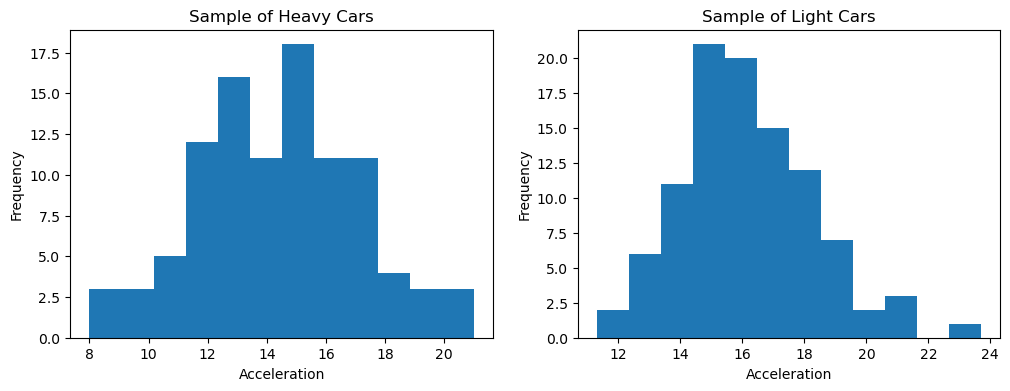

In [87]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 11: Set up the null and alternative hypotheses for this test

In [88]:
call_on_students(1)

['Jee Soo']


**Null hypothesis:**

- Light cars on average do not accelerate faster than heavy cars


**Alternative hypothesis:**

- Light cars on average accelerate significantly faster than heavy cars


### Task 12: Describe your Type 1 and Type 2 errors in this context

In [89]:
call_on_students(1)

['Elif']


**Type I Error:**

- Reject null when in fact we should have failed to reject (False Positive). Our test tells us that lighter cars accelerate sign. faster than heavy cars when in reality they do not.


**Type II Error:**

- Fail to reject null when in fact we should have (False Negative). Our test tells us that there is no sign. difference in acceleration b/t light and heavy cars when in reality light cars accelerate faster on average.



### Task 13: The Hypothesis Test!

### 13a: Describe the type of test:

In [90]:
call_on_students(1)

['Jee Soo']


Description:

- Comparing means (two indepedent samples)
- Two sample ttest (unpaired)
- One Sided Test (Greater)


### 13b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [92]:
light_cars.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
319,32.2,4,108.0,75,2265,15.2,80,3,toyota corolla


In [91]:
call_on_students(1)

['Anbita']


In [95]:
# Code here
alpha = .05
t_stat, p_value = stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'], alternative='greater')
t_stat, p_value

(5.00874014469676, 6.048220334084496e-07)

### 13c: Analyze your results: can you reject the null hypothesis?

In [96]:
call_on_students(1)

['Ricky']


Can you reject the null hypothesis?

- Reject null, pvalue < alpha. Light cars on average have sign. greater acceleration than heavy cars
